### Problem 1

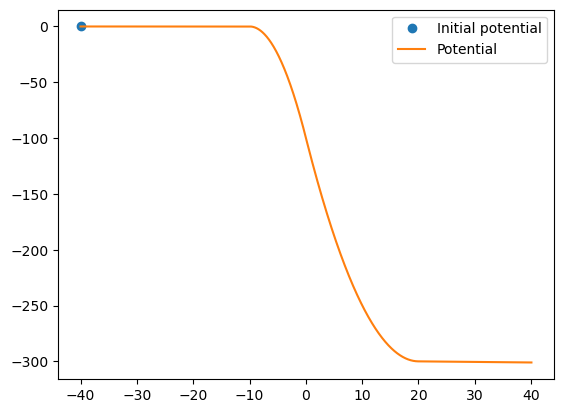

In [ ]:
import matplotlib.pyplot as plt

def p(x) : 
    if (-10 <= x) and (x < 0) : 
        return -2
    elif (0 < x) and (x <= 20) : 
        return 1
    return 0

psi_init = 0
psi_dif_init = 0
x_init = -40
h = 0.05

plt.plot(x_init, psi_init, 'o', label="Initial potential")

x_list = [x_init]
psi_list = [psi_init]
while x_init <= 40 and x_init >= -40: 
    
    psi_dif_dif = p(x_init)
    psi_dif_init += psi_dif_dif * h
    psi_init += psi_dif_init * h
    x_init += h

    x_list.append(x_init)
    psi_list.append(psi_init)

plt.plot(x_list, psi_list, label="Potential")
plt.legend()
plt.show()

### Problem 2

##### Use numerical differentiation method : Finite difference approximation

##### $$ f(x)' \approx \frac{f(x + h) - f(x)}{h} + O(h) $$

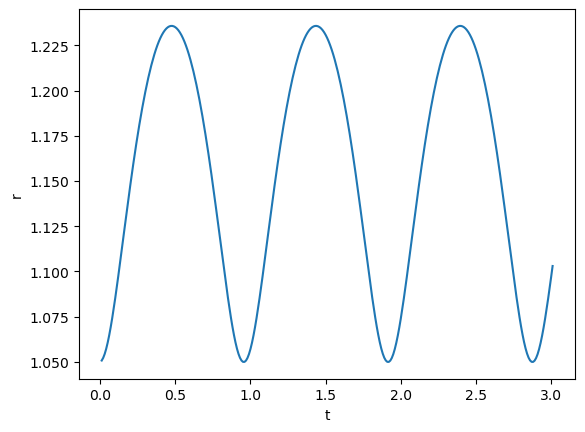

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def U(r) : 
    return 4 * (r**(-12) - r**(-6))

def dU_dr(r, h) : 
    return (U(r + h) - U(r)) / h

t_list = []
r_list = []

t_init = 0
r_init = 1.05
r_dif_init = 0

F = np.zeros(shape=(2), dtype=float)
F[0] = r_dif_init
F[1] = -1 * dU_dr(r_init, 0.01)

t_step = 0.01
while t_init <= 3 : 

    r_dif_init += F[1] * t_step
    r_init += r_dif_init * t_step
    t_init += t_step

    F[0] = r_dif_init
    F[1] = -1 * dU_dr(r_init, 0.01)

    t_list.append(t_init)
    r_list.append(r_init)

plt.plot(t_list, r_list)
plt.xlabel("t")
plt.ylabel("r")
plt.show()

### Problem 3

Beta [0.2] has exceed 100000 at day = [66]
Beta [0.1] has exceed 100000 at day = [189]
Beta [0.05] didn't exceed 100000


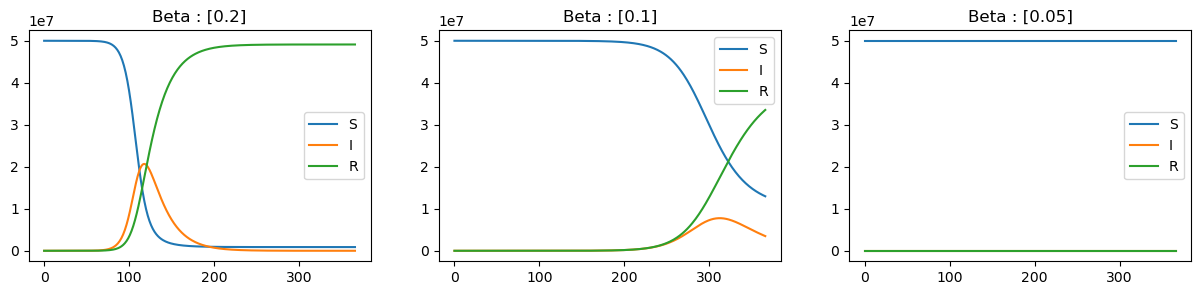

In [ ]:
import matplotlib.pyplot as plt

def dS_dt(S, beta, N, I) : 
    return -1 * beta * S * I / N

def dI_dt(I, beta, gamma, N, S) : 
    return beta * S * I / N - 1 * gamma * I

def dR_dt(gamma, I) : 
    return gamma * I

gamma = 0.05
N = 50000000
beta_list = [0.2, 0.1, 0.05]

fig, axes = plt.subplots(ncols=3, figsize=(15, 3))

for beta, ax in zip(beta_list, axes) : 
    t_init = 0
    S_init = N
    I_init = 10
    R_init = 0
    
    t_list = [t_init]
    S_list = [S_init]
    I_list = [I_init]
    R_list = [R_init]
    valid = True
    while t_init <= 365 : 
        S_current = S_init
        I_current = I_init
        R_current = R_init

        S_init += dS_dt(S_current, beta, N, I_current)
        I_init += dI_dt(I_current, beta, gamma, N, S_current)
        R_init += dR_dt(gamma, I_current)
        t_init += 1

        t_list.append(t_init)
        S_list.append(S_init)
        I_list.append(I_init)
        R_list.append(R_init)

        if I_init > 100000 and valid : 
            print("Beta [{}] has exceed 100000 at day = [{}]".format(beta, t_init))
            valid = False

    ax.plot(t_list, S_list, label="S")
    ax.plot(t_list, I_list, label="I")
    ax.plot(t_list, R_list, label="R")
    ax.set_title("Beta : [{}]".format(beta))
    ax.legend()

    if valid : 
        print("Beta [{}] didn't exceed 100000".format(beta))
    del t_list, S_list, I_list, R_list

plt.show()



### Problem 4

<p align="center">
    <img src="temp_11.png" width=800px height=500px loc="center">
</p>